## Assignment 6
This assignment requires you to work with Facebook network data, data preprocessing and `networkx`. Note that this is real data from real people!

### Part 1: Preparing data

The dataset you will be working with is available here: https://snap.stanford.edu/data/egonets-Facebook.html

You're first job is to 
1. Download the data
2. Unpack the data
3. Import the data as an undirected graph in `networkx`

This should **all be done from your notebook in Python**. This is an important step for you to automate data preprocessing. 

Note: this could take a while, so if you feel adventurous you can use the `multiprocessing` library to speed things up.

Hand-in:
* The code for downloading, unpacking and loading the dataset

In [1]:
# Downloading file
import os
import urllib.request as req
from urllib.parse import urlparse
import sys

def download(urls):
    for url in urls:
        urlstring = urlparse(url)
        urlsplit = urlstring.path.split("/")
        to = urlsplit[-1]
        req.urlretrieve(url, to)
        print("Downloading file to ./", to, sep="")

download(["https://snap.stanford.edu/data/facebook_combined.txt.gz"])


In [1]:
import gzip
import shutil

with gzip.open('facebook_combined.txt.gz', 'rb') as f_in:
    with open('facebook_combined.txt', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

## Part 2: Analyse the data

Now, let's take a look at the network you imported. 

By *node degree* we mean the *number of edges to and from a node*. This is different in an undirected network, where in-degree == out-degree, and a directed network where in-degree != out-degree.

By *graph degree* we mean the *number of edges in the entire network*.

Hand-in code that display:
* The number of nodes in the network
* The number of edges in the network
* The average degree in the network
* A visualisation of the network inside your notebook

In [3]:
import networkx as nx
g = nx.read_edgelist('facebook_combined.txt')
print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


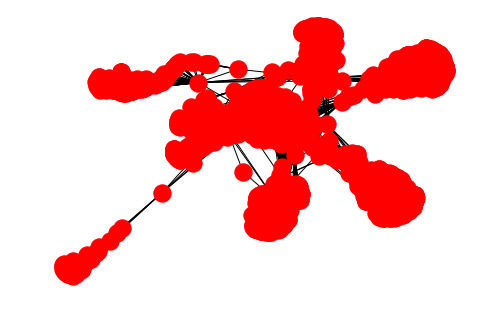

In [24]:
import matplotlib.pyplot as plt
nx.draw(g)
plt.show()

### Part 3: Find the most popular people

We're naturally interested in who has the most friends, so we want to extract **top 10**. That is, the 10 most connected people.

Hand-in:
* Code that extracts and reports the 10 people with the most connections in the network

In [30]:
#creates a dict of nodes with degree centrality as the value.
my_dict = nx.degree_centrality(g)

# sorting the dict by values
sorted_by_value = sorted(my_dict.items(), key=lambda kv: kv[1])

#getting top 10
print(sorted_by_value[:10])
new_tuple = [(nodeid, 1/value) for nodeid, value in sorted_by_value[:10]]
new_tuple



[('11', 0.00024764735017335313), ('12', 0.00024764735017335313), ('15', 0.00024764735017335313), ('18', 0.00024764735017335313), ('37', 0.00024764735017335313), ('43', 0.00024764735017335313), ('74', 0.00024764735017335313), ('114', 0.00024764735017335313), ('209', 0.00024764735017335313), ('210', 0.00024764735017335313)]


[('11', 4038.0),
 ('12', 4038.0),
 ('15', 4038.0),
 ('18', 4038.0),
 ('37', 4038.0),
 ('43', 4038.0),
 ('74', 4038.0),
 ('114', 4038.0),
 ('209', 4038.0),
 ('210', 4038.0)]